In [1]:
# Loading imports 
import os
import torch
import faiss as FF
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from scipy.io import wavfile as wavfile
from scipy.signal import stft as stft
from faiss import write_index, read_index
from langchain.embeddings import LlamaCppEmbeddings
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from helper_fn import find_k_most_similar
from helper_class import *
print("\n\n\nImports loaded")

llama.cpp: loading model from _model/alpaca-lora-65B.ggmlv3.q4_0.bin
llama_model_load_internal: format     = ggjt v3 (latest)
llama_model_load_internal: n_vocab    = 32000
llama_model_load_internal: n_ctx      = 2048
llama_model_load_internal: n_embd     = 8192
llama_model_load_internal: n_mult     = 256
llama_model_load_internal: n_head     = 64
llama_model_load_internal: n_layer    = 80
llama_model_load_internal: n_rot      = 128
llama_model_load_internal: ftype      = 2 (mostly Q4_0)
llama_model_load_internal: n_ff       = 22016
llama_model_load_internal: n_parts    = 1
llama_model_load_internal: model size = 65B
llama_model_load_internal: ggml ctx size =    0.18 MB
llama_model_load_internal: mem required  = 38610.46 MB (+ 10240.00 MB per state)





Imports loaded


llama_new_context_with_model: kv self size  = 10240.00 MB
AVX = 1 | AVX2 = 1 | AVX512 = 1 | AVX512_VBMI = 0 | AVX512_VNNI = 1 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | VSX = 0 | 


train_arq90.wav


TypeError: Dimensions of C (1, 1, 372, 5211) should be one smaller than X(5211) and Y(372) while using shading='flat' see help(pcolormesh)

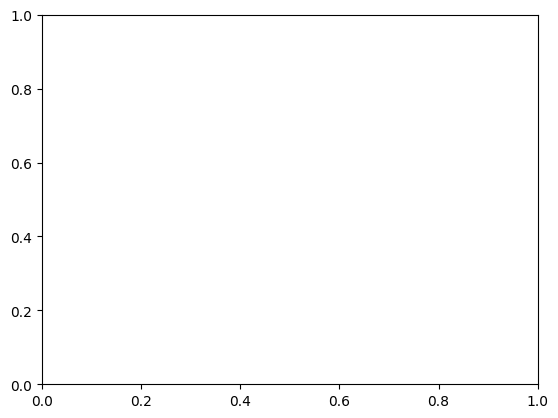

In [2]:
testPath = "data/train/train_arq90.wav"
new_out = find_k_most_similar(testPath, 3)
print(new_out)

In [ ]:
loader = TextLoader('./_faiss_documents/questionSet.txt')
documents = loader.load()
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size = 50, 
    chunk_overlap = 0,
    length_function = len)
docs = text_splitter.split_documents(documents)

for i in docs:
    print(i.page_content)
    print()
print(cosineIndex_llm.ntotal)
print(cosineIndex_signal.ntotal)

In [ ]:
# new_query = llama.embed_query("Give a brief and short summary of the signal")
# new_query = np.array([new_query])
# new_query /= np.linalg.norm(new_query, axis=1, keepdims=True)
# # print(new_query)

# dist, idx = cosineindex_llm.search(new_query, 3)
# print(dist)
# print(idx)
# print(idx.squeeze())
# print(dist.squeeze())

# print(cosineindex_llm.ntotal)
# testing = cosineindex_llm.reconstruct(1)
# print(testing)

In [ ]:
## upload_path = os.path.join("data/train", "train_ALIS.wav")

request = input("Input your query...\n")
while (request != ""):
    query_list = process_general_query(request, llama, cosineindex_llm=cosineindex_llm, cosine_search_threshold=0.6, k_neighbours=5)
    if len(query_list)!=0:
        for count, item in enumerate(query_list):
            print(f"{count}. {docs[item[1]].page_content}")
        selected_query = int(input("Choose which query to execute?"))
        if selected_query == -1:
            process_empty_list(request)
        else:    
            testOutput = process_selected_query(query_list[selected_query][1], cosineindex_llm, cosineindex_signal, llama, simCLR)
            print(testOutput)
    request = input("Input your query...\n")
print("exited...")

In [ ]:
testOutput = test_process_general_query("List me the most similar signal", llm=llama, cosineindex_llm=cosineindex_llm, cosine_search_threshold=0.8, k_neighbours=3)
print(testOutput)

In [ ]:
# uploaded_signal = os.path.join("data/train", "train_ALIS.wav")

# summarise_signal(cosineindex_signal=cosineindex_signal,
#                       cosineindex_llm=cosineindex_llm,
#                       uploaded_signal=uploaded_signal,
#                       llm_model=llama,
#                       simclr_model=simCLR, 
#                       k_neighbours=3)

In [ ]:
a = [1,2,3]
b = [0.5,0.6,0.7]

c = list(zip(a, b))
print(c)
print(c[2][1])

In [ ]:
os.rmdir("test")